In [1]:
import pandas as pd


df = pd.read_csv("european_capitals_history_full2.csv")
df['time'] = pd.to_datetime(df['time'])

print(" Informacje o datasetcie:")
print(df.info())


print(" Liczba braków w każdej kolumnie:")
print(df.isnull().sum())


missing_by_city = df.groupby('city').apply(lambda x: x.isnull().sum())

print("Liczba braków w każdej kolumnie, podzielona na miasta:")
print(missing_by_city)

 Informacje o datasetcie:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76432 entries, 0 to 76431
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    76432 non-null  object 
 1   temp    76432 non-null  float64
 2   tmin    76431 non-null  float64
 3   tmax    76432 non-null  float64
 4   prcp    64623 non-null  float64
 5   wspd    75290 non-null  float64
 6   pres    75294 non-null  float64
 7   city    76432 non-null  object 
 8   lat     76432 non-null  float64
 9   lon     76432 non-null  float64
dtypes: float64(8), object(2)
memory usage: 5.8+ MB
None
 Liczba braków w każdej kolumnie:
time        0
temp        0
tmin        1
tmax        0
prcp    11809
wspd     1142
pres     1138
city        0
lat         0
lon         0
dtype: int64
Liczba braków w każdej kolumnie, podzielona na miasta:
            time  temp  tmin  tmax  prcp  wspd  pres  city  lat  lon
city                                                 

C:\Users\gduls\AppData\Local\Temp\ipykernel_11372\3868451169.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_city = df.groupby('city').apply(lambda x: x.isnull().sum())


In [10]:
for city in df['city'].unique():
    city_df = df[df['city'] == city].set_index('time').sort_index()
    full_range = pd.date_range(start=city_df.index.min(), end=city_df.index.max(), freq='D')
    missing_dates = full_range.difference(city_df.index)
    
    if len(missing_dates) > 0:
        print(f"{city}: brakujące daty ({len(missing_dates)} dni)")
        print(missing_dates)


Warszawa: brakujące daty (2204 dni)
DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-10', '2026-01-11', '2026-01-12',
               '2026-01-13', '2026-01-14'],
              dtype='datetime64[ns]', length=2204, freq='D')
Berlin: brakujące daty (2204 dni)
DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-10', '2026-01-11', '2026-01-12',
               '2026-01-13', '2026-01-14'],
              dtype='datetime64[ns]', length=2204, freq='D')
Praga: brakujące daty (2204 

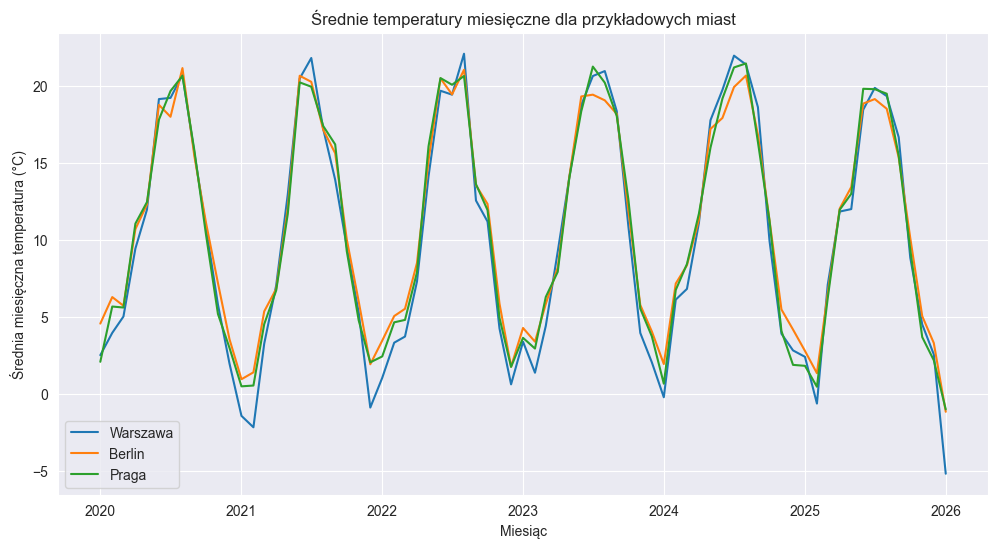

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Konwertujemy czas na datetime, jeśli nie jest
df['time'] = pd.to_datetime(df['time'])

# Tworzymy kolumnę z rokiem i miesiącem
df['year_month'] = df['time'].dt.to_period('M')

# Wybieramy przykładowe miasta
sample_cities = ['Warszawa', 'Berlin', 'Praga']

plt.figure(figsize=(12,6))

for city in sample_cities:
    city_data = df[df['city']==city]
    
    # Grupujemy po miesiącu i liczymy średnią temperaturę
    monthly_avg = city_data.groupby('year_month')['temp'].mean()
    
    # Rysujemy wykres
    plt.plot(monthly_avg.index.to_timestamp(), monthly_avg.values, label=city)

plt.xlabel('Miesiąc')
plt.ylabel('Średnia miesięczna temperatura (°C)')
plt.title('Średnie temperatury miesięczne dla przykładowych miast')
plt.legend()
plt.show()


In [3]:
import pandas as pd

#  Wczytanie danych
df = pd.read_csv("european_capitals_history_full2.csv")

# Kolumny meteorologiczne do uzupełnienia
weather_cols = ['temp', 'tmin', 'tmax', 'prcp', 'wspd', 'pres']

# ⃣ Grupowanie po mieście i wypełnianie braków
df_clean = df.groupby('city').apply(
    lambda x: x[weather_cols].interpolate(method='linear').ffill().bfill()
)

# Przywrócenie kolumn meta (date, lat, lon)
meta_cols = ['time', 'city', 'lat', 'lon']
df_meta = df[meta_cols].reset_index(drop=True)
df_clean = df_clean.reset_index(drop=True)
df_final = pd.concat([df_meta, df_clean], axis=1)

#  Sprawdzenie braków po czyszczeniu
print(" Braki danych po wypełnieniu:")
print(df_final.isnull().sum())

df_final['temp_rolling3'] = df.groupby('city')['temp'].transform(lambda x: x.rolling(3).mean())
df_final['temp_diff1'] = df.groupby('city')['temp'].diff()

df_final = df_final.dropna(subset=['temp_rolling3', 'temp_diff1']).reset_index(drop=True)


#  Zapis do nowego CSV
df_final.to_csv("european_capitals_history_clean2.csv", index=False)
print(" Czysty dataset zapisany: european_capitals_history_clean2.csv")

C:\Users\gduls\AppData\Local\Temp\ipykernel_11372\2594950275.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df.groupby('city').apply(


 Braki danych po wypełnieniu:
time    0
city    0
lat     0
lon     0
temp    0
tmin    0
tmax    0
prcp    0
wspd    0
pres    0
dtype: int64
 Czysty dataset zapisany: european_capitals_history_clean2.csv


In [4]:
cols = ['temp','tmin','tmax','prcp','wspd','pres']
for col in cols:
    q1 = df_final[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df_final[col] = df_final[col].clip(lower=q1, upper=q99)


In [5]:
print(df_final.isnull().sum())

time             0
city             0
lat              0
lon              0
temp             0
tmin             0
tmax             0
prcp             0
wspd             0
pres             0
temp_rolling3    0
temp_diff1       0
dtype: int64


Podstawowe informacje o datasetcie:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76362 entries, 0 to 76361
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           76362 non-null  object 
 1   city           76362 non-null  object 
 2   lat            76362 non-null  float64
 3   lon            76362 non-null  float64
 4   temp           76362 non-null  float64
 5   tmin           76362 non-null  float64
 6   tmax           76362 non-null  float64
 7   prcp           76362 non-null  float64
 8   wspd           76362 non-null  float64
 9   pres           76362 non-null  float64
 10  temp_rolling3  76362 non-null  float64
 11  temp_diff1     76362 non-null  float64
dtypes: float64(10), object(2)
memory usage: 7.0+ MB
None

Opis statystyczny danych meteorologicznych:
               temp          tmin          tmax          prcp          wspd  \
count  76362.000000  76362.000000  76362.000000  76362.00

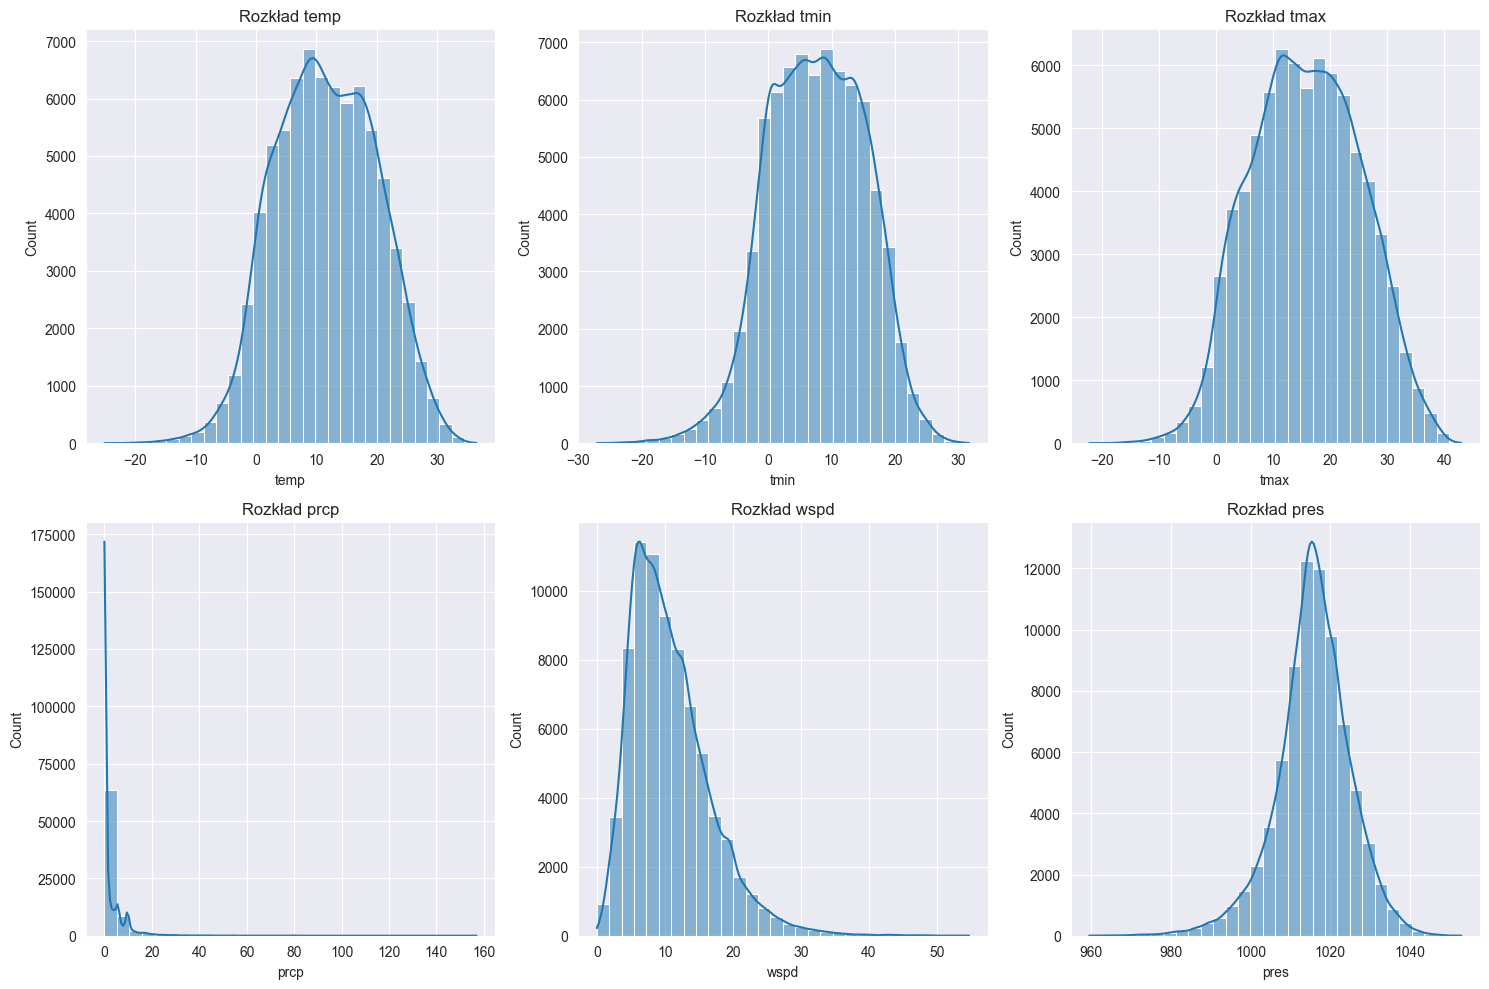

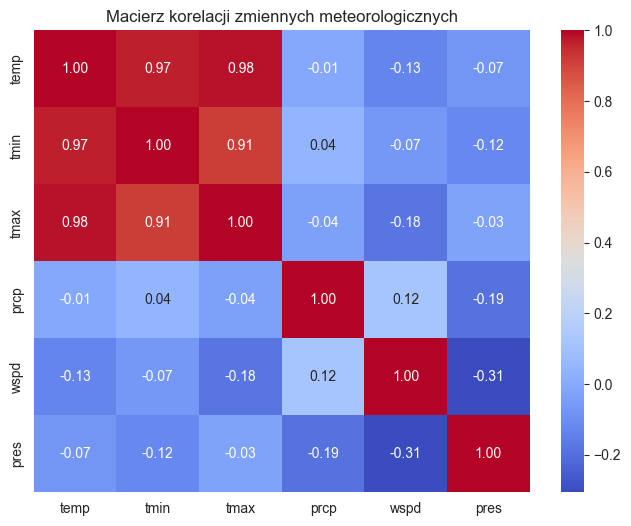

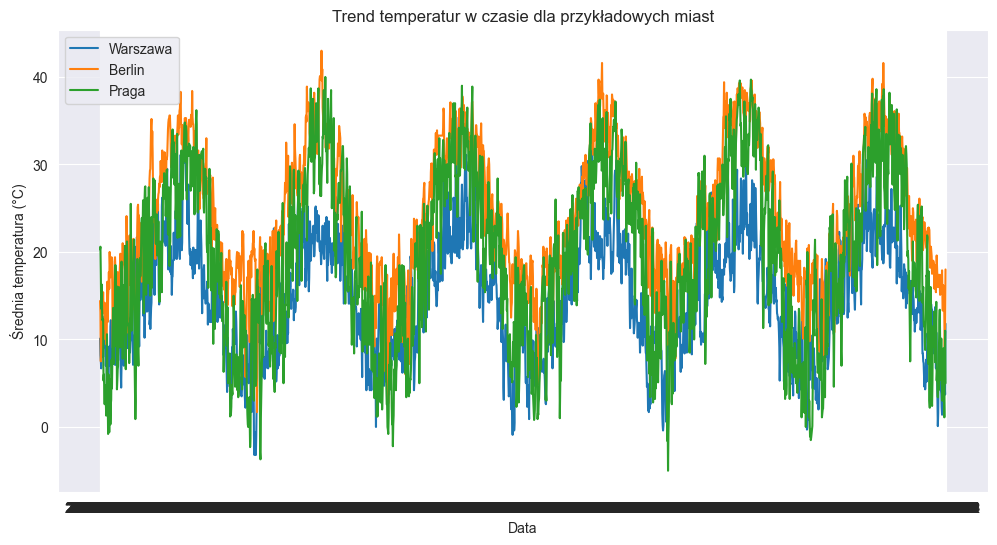

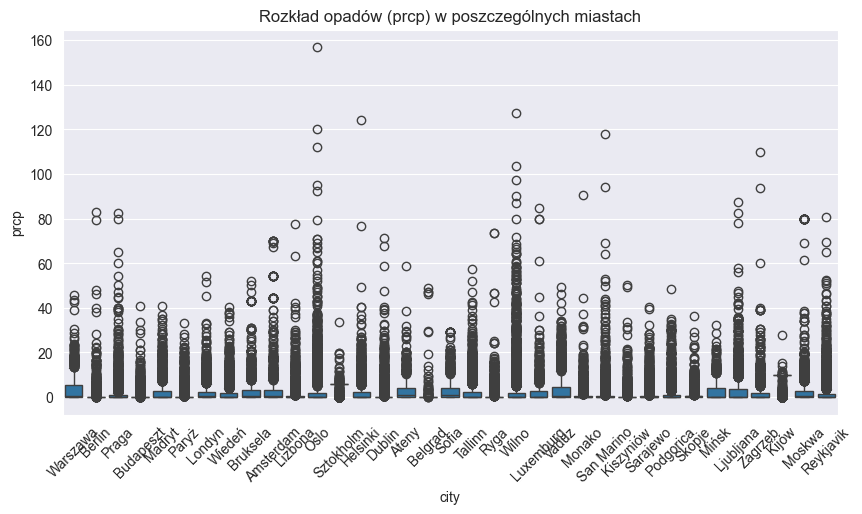

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie wyczyszczonego datasetu
df = pd.read_csv("european_capitals_history_clean2.csv")

# --- Podstawowa analiza statystyczna ---
print("Podstawowe informacje o datasetcie:")
print(df.info())
print("\nOpis statystyczny danych meteorologicznych:")
print(df[['temp', 'tmin', 'tmax', 'prcp', 'wspd', 'pres']].describe())

# --- Liczba wpisów na miasto ---
print("\nLiczba wpisów dla każdego miasta:")
print(df['city'].value_counts())

# --- Wizualizacja rozkładów danych ---
weather_cols = ['temp', 'tmin', 'tmax', 'prcp', 'wspd', 'pres']

plt.figure(figsize=(15,10))
for i, col in enumerate(weather_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Rozkład {col}')
plt.tight_layout()
plt.show()

# --- Korelacja między zmiennymi meteorologicznymi ---
corr = df[weather_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji zmiennych meteorologicznych')
plt.show()

# --- Trend temperatur w czasie dla przykładowych miast ---
sample_cities = ['Warszawa','Berlin','Praga']
plt.figure(figsize=(12,6))

for city in sample_cities:
    city_data = df[df['city']==city]
    plt.plot(city_data['time'], city_data['tmax'], label=city)

plt.xlabel('Data')
plt.ylabel('Średnia temperatura (°C)')
plt.title('Trend temperatur w czasie dla przykładowych miast')
plt.legend()
plt.show()

# --- Analiza opadów ---
plt.figure(figsize=(10,5))
sns.boxplot(x='city', y='prcp', data=df)
plt.xticks(rotation=45)
plt.title('Rozkład opadów (prcp) w poszczególnych miastach')
plt.show()


In [7]:
import plotly.express as px
df_avg = df.groupby(['city', 'lat', 'lon'], as_index=False)['temp'].mean()

# Mapa punktowa
fig = px.scatter_geo(
    df_avg,
    lat='lat',
    lon='lon',
    color='temp',
    size='temp',
    hover_name='city',
    projection='natural earth',
    color_continuous_scale='RdYlBu_r',
    title='Średnia temperatura w miastach'
)

fig.update_layout(geo=dict(showland=True, landcolor="lightgray"))
fig.show()

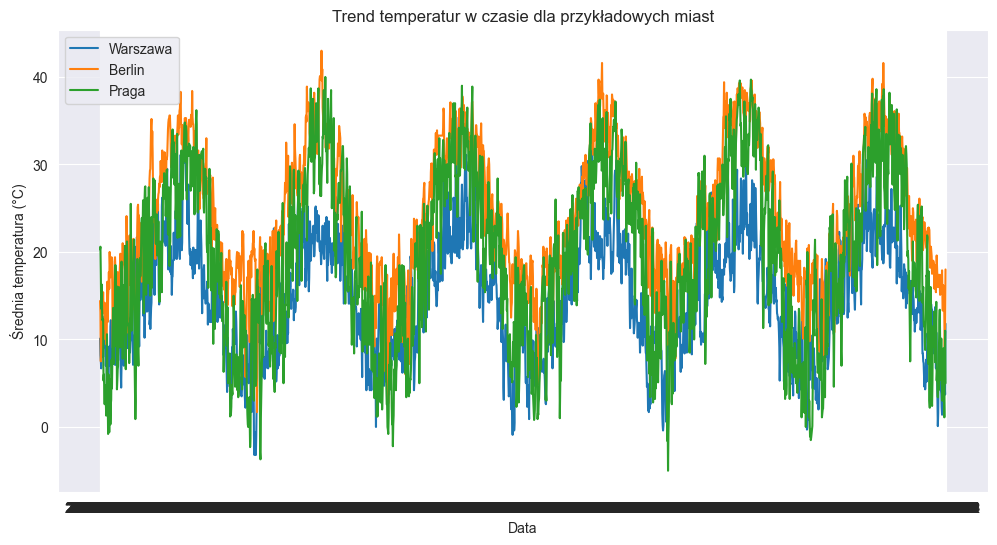

In [8]:
sample_cities = ['Warszawa','Berlin','Praga']
plt.figure(figsize=(12,6))

for city in sample_cities:
    city_data = df[df['city']==city]
    plt.plot(city_data['time'], city_data['tmax'], label=city)

plt.xlabel('Data')
plt.ylabel('Średnia temperatura (°C)')
plt.title('Trend temperatur w czasie dla przykładowych miast')
plt.legend()
plt.show()